# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 3 </center>

# <center>Feature Engineering</center>

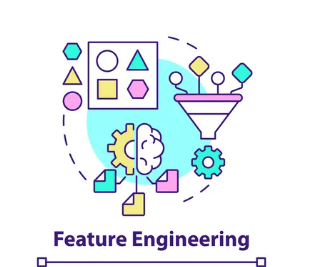

# 1. Imputing Categorical Features using sklearn

Instructions:

- Load data from loan_train.csv file. Explore to discover missing values if any.


- Use sklearn SimpleImputer to Impute the missing values with most_frequent value.



In [1]:
import pandas as pd
df = pd.read_csv("loan_train.csv")
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.drop(labels = 'Loan_ID', axis = 1, inplace = True)
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
cdf = df.select_dtypes(include = ['object'])
cdf

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [11]:
from sklearn.impute import SimpleImputer
imputeC = SimpleImputer(strategy="most_frequent")
data = imputeC.fit_transform(cdf)
data
#resultdf = pd.DataFrame(data,columns = cdf.columns)
#resultdf.isna().sum()

array([['Male', 'No', '0', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '1', ..., 'No', 'Rural', 'N'],
       ['Male', 'Yes', '0', ..., 'Yes', 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', '1', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '2', ..., 'No', 'Urban', 'Y'],
       ['Female', 'No', '0', ..., 'Yes', 'Semiurban', 'N']], dtype=object)

In [13]:
resultdf = pd.DataFrame(data,columns = cdf.columns)
resultdf.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [14]:
resultdf.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

# 2. Encoding Categorical Features

### 2.1. Encoding Nominal Features

Instructions:

- Explore data and discover nominal features.


- Use one-hot encoding technique to encode nominal features.

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = ohe.fit_transform(resultdf[['Gender', 'Married', 'Self_Employed']]).toarray()
result

array([[0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [18]:
ohe.get_feature_names()

C:\Users\lab1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes'],
      dtype=object)

### 2.2. Encoding Ordinal Features

Instructions:

- Explore data and discover all ordinal features


- Use OrdinalEncoder to encode ordinal Features

In [19]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
result = oe.fit_transform(resultdf[['Education', 'Property_Area']])
result

array([[0., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [0., 2.],
       [0., 1.]])

### 2.3. Label Encoder

Instructions:

- Use LabelEncoder to encode target feature.


- Analyze the difference between Ordinal Encoder and Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(resultdf.Loan_Status)
target

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,